## Loading CIFAR Dataset

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import warnings

warnings.filterwarnings(action='ignore') 

def load_pickle(f):
    return  pickle.load(f, encoding='latin1')

def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000,3072)
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=10000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'Data/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

    # Subsample the data 
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]
    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
x_train, y_train, x_val, y_val, x_test, y_test = get_CIFAR10_data()


print('Train data shape: ', x_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', x_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', x_test.shape)
print('Test labels shape: ', y_test.shape)



Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (10000, 3072)
Test labels shape:  (10000,)


## Plotting samples

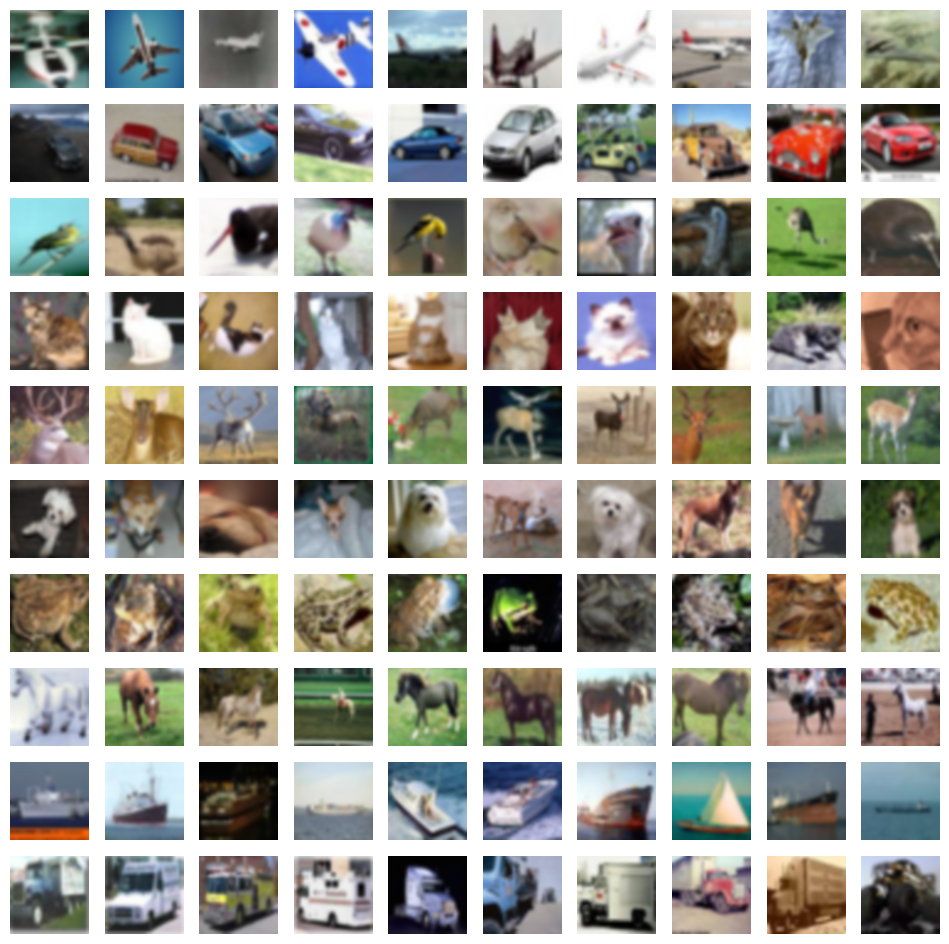

In [19]:
import matplotlib.pyplot as plt
import numpy as np

def plot_CIFAR(ind):
    arr = x_train[ind]
    sc_dpi = 157.35
    R = arr[0:1024].reshape(32,32)/255.0
    G = arr[1024:2048].reshape(32,32)/255.0
    B = arr[2048:].reshape(32,32)/255.0

    img = np.dstack((R,G,B))
    return img


#Classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Create a figure with 10 rows and 10 columns
fig, axs = plt.subplots(10, 10, figsize=(12, 12))

for i, Y in enumerate(Classes):
    # Get indices of samples for the current class
    indices = np.where(y_train == int(Y))[0]

    # Choose 10 random samples for the current class
    random_indices = np.random.choice(indices, 10, replace=False)

    for j, idx in enumerate(random_indices):
        ax = axs[i, j]
        ax.imshow(plot_CIFAR(idx),interpolation='bicubic')
        ax.grid(False)
        ax.axis('off')

plt.show()

### Preprocessing

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

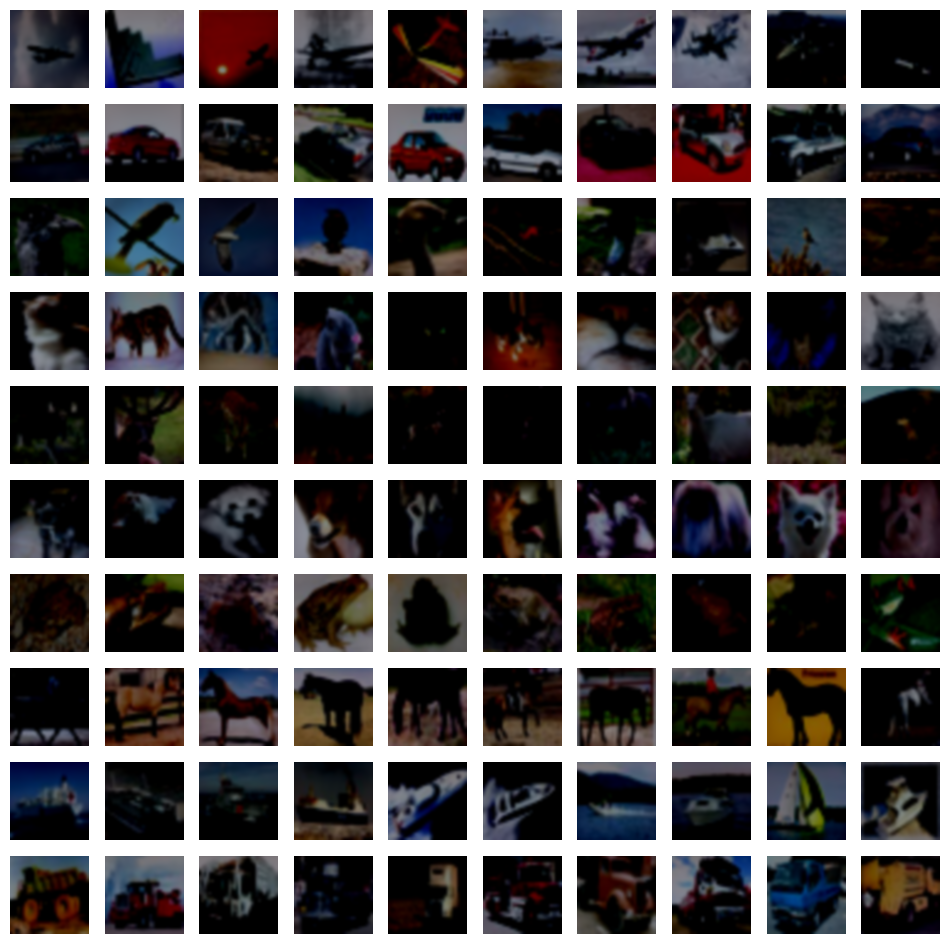

In [20]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_val = x_val.astype('float32')

mu = np.mean(x_train, axis=0)
x_train -= mu
x_test -= mu
x_val -= mu

fig, axs = plt.subplots(10, 10, figsize=(12, 12))

for i, Y in enumerate(Classes):
    # Get indices of samples for the current class
    indices = np.where(y_train == int(Y))[0]

    # Choose 10 random samples for the current class
    random_indices = np.random.choice(indices, 10, replace=False)

    for j, idx in enumerate(random_indices):
        ax = axs[i, j]
        ax.imshow(plot_CIFAR(idx),interpolation='bicubic')
        ax.grid(False)
        ax.axis('off')

plt.show()

x_train /= 255 #This operation effectively scales down the pixel values in the image data to a range between 0 and 1
x_test /= 255
x_val /= 255



## Using SKlearn

In [21]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(100, 50, 20),activation= 'relu',solver='adam', learning_rate='adaptive', alpha=1.0, max_iter=200)
model.fit(x_train, y_train)


print("Train accuracy   = {:.2f}".format(model.score(x_train, y_train)))
print("Test accuracy = {:.2f}".format(model.score(x_test, y_test)))

Train accuracy   = 0.56
Test accuracy = 0.52


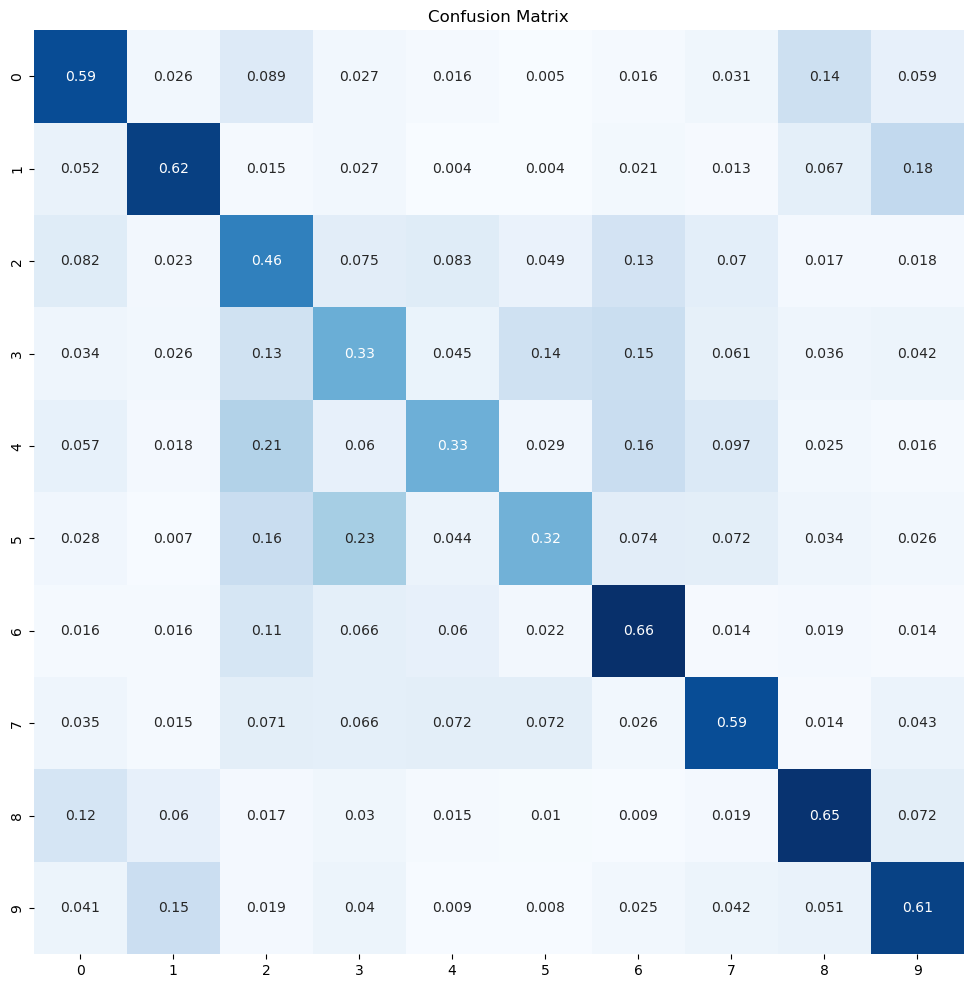

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, normalize=False, figsize=(12, 12)):
    cm = confusion_matrix(y_true, y_pred, labels=range(10))
    plt.figure(figsize=figsize)
    annot = cm/cm.sum(axis=1) if normalize else True
    sns.heatmap(cm, annot=annot, cmap=plt.cm.Blues, cbar=False)
    plt.title("Confusion Matrix")
    plt.show()

y_pred = model.predict(x_test)
plot_confusion_matrix(y_test, y_pred, normalize=True)

#Classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']